# Теория


### где сегодня используются ансамбли
- Везде, где можно применять классические алгоритмы (ансамбли дают более точные результаты)
- Поисковые системы (ранжирование реультатов)
- Компьютерное зрение (распознавание объектов)

### Идея
Если взять несколько методов научить их последовательно исправлять ошибки друг друга, качество такой системы будет выше, чем каждого из методов по отдельности.

Лучше, если алгоритмы неустойчивы к аномалиям в данных: поэтому для ансамблей берут Регрессию и Деревья Решений.

### Как собрать ансамбль?
- ансамбль собирают из supervised-алгоритмов, потому что важно знать, в чем/где ошибаются модели
- в плане последовательности можно собрать как угодно, но опытным путем нашлись три способа: *стэкинг*, *бэггинг* и *бустинг*


## Stacking

Идея: на одних и тех же данных обучаем несколько разных алгоритмов (например, классификации). Передаем реультаты финальному, он принимает решение (обычно это регрессия).

![](ML-stacking.png)

*С добавлением новых моделей в ансамбль, мы не повысим качество предсказаний*

## Bagging

Идея: несколько раз тренируем один и тот же алгоритм на разных подвыборках из данных. В результате усредняем ответы и определяем финальный.

![](ML-bagging.jpeg)

Самый популярный бэггинг - это [Random Forest](https://ru.wikipedia.org/wiki/Random_forest) (набор решающих деревьев)<br>
Бэггинг -- эффективный метод, если у вас небольшой датасет.<br>
[Чем бэггинг отличается от кросс-валидации?](https://www.kaggle.com/questions-and-answers/120778)

## Boosting

Идея: обучаем алгоритмы последовательно, каждый следующий уделяет внимание ошибкам предыдущего. Продолжаем, пока метрики не станут хорошими

![](ML-boosting.jpg)

[статья про популярные типы бустинга](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db)

### разница между бэггингом и бустингом

![](ML-bagging-vs-boosting.jpg)

**Когда что использовать?**
- Бэггинг, если у данных высокая дисперсия
- Бустинг, если данные неравномерно распределены

**Bagging VS Boosting**

Нет одноначного ответа, что лучше, это зависит от задачи и данных. Если модель хорошо работает на обучающих данных, но плохо на тестовых, то в данных может быть высокая диспрерсия. Если модель плохо работает на обучающих данных, стоит проверить распределение классов/параметров.
Предварительно стоит проаналиировать данные, затем попробовать несколько моделей, постепенно изменяя параметры.

# Практика

Поработаем с датасетом [спам-сообщений](https://www.kaggle.com/uciml/sms-spam-collection-dataset)

In [1]:
import numpy as np
import pandas as pd
# from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## подготовим данные

In [6]:
data = pd.read_csv('spam.csv', encoding = "latin-1")

In [7]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1, inplace=True) # выкинем ненужные колонки

data.rename(columns={"v1": "spam", "v2": "content"}, inplace=True) # переименуем колонки

# изменим значения в первой колонке: 'spam' в 1  и 'ham' в 0
data["spam"]=data["spam"].map({'spam':1,'ham':0}) 

data

,spam,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### немножко EDA

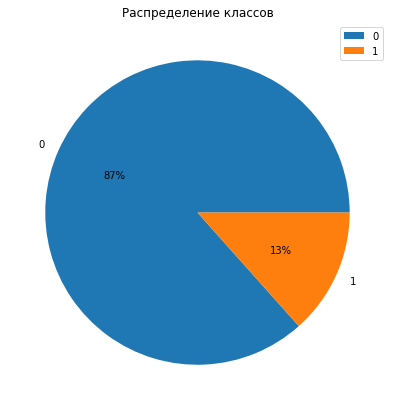

In [9]:
classes = pd.value_counts(data["spam"])

classes.plot(kind='pie',figsize=(7,7),autopct='%0.f%%', legend=True, title ="Распределение классов") 


plt.ylabel('')

plt.show()

Хорошо бы отбалансировать, что спама/не спама было поровну.

In [10]:
data[data.spam == 0].sample(n=747)

,spam,content
3973,0,Roger that. WeÛ÷re probably going to rem in a...
1835,0,* Will be september by then!
998,0,Then Ì_ wait 4 me at bus stop aft ur lect lar....
2607,0,:-) yeah! Lol. Luckily i didn't have a starrin...
1819,0,Dunno dat's wat he told me. Ok lor...
...,...,...
3692,0,I was about to do it when i texted. I finished...
3325,0,Huh so fast... Dat means u havent finished pai...
1579,0,"Why is that, princess? I bet the brothas are a..."
519,0,Usually the person is unconscious that's in ch...


In [13]:
data.shape

(5572, 2)

In [11]:
data_balanced = data[data.spam == 1].append(data[data.spam == 0].sample(n=747))

In [12]:
data_balanced.shape

(1494, 2)

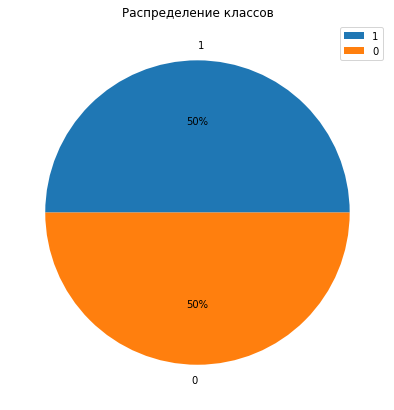

In [14]:
classes = pd.value_counts(data_balanced["spam"])

classes.plot(kind='pie',figsize=(7,7),autopct='%0.f%%', legend=True, title ="Распределение классов")


plt.ylabel('')

plt.show()

### векторизуем тексты

Здесь TfidfVectorizer. Можно doc2vec.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")

X = vectorizer.fit_transform(data_balanced['content'])

In [20]:
# разделение на обучающую и тестовую выборку

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, data_balanced["spam"], test_size=0.15, random_state=25)

In [21]:
print(X_train.shape, X_test.shape)

(1269, 4442) (225, 4442)


## Bagging

сначала обучим одно решающее дерево

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [23]:
tree_clf = DecisionTreeClassifier()

In [24]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
tree_y_pred = tree_clf.predict(X_test)

In [32]:
print(len(tree_y_pred))
print(tree_y_pred)

225
[1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0
 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1
 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0
 1 0 1]


In [33]:
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       106
           1       0.93      0.94      0.94       119

    accuracy                           0.93       225
   macro avg       0.93      0.93      0.93       225
weighted avg       0.93      0.93      0.93       225



теперь обучим набор деревьев: Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators=100, verbose=1)

используемые параметры модели: 
- n_estimators : число деревьев в ансамбле (лесе)
- max_depth : глубина дерева 
- verbose : пояснения о процессе обучения

In [47]:
forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomForestClassifier(verbose=1)

In [48]:
forest_y_pred = forest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [49]:
print(classification_report(y_test, forest_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       106
           1       0.97      0.92      0.94       119

    accuracy                           0.94       225
   macro avg       0.94      0.94      0.94       225
weighted avg       0.94      0.94      0.94       225



## Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gb_clf = GradientBoostingClassifier(n_estimators=1000, random_state=10, verbose=1)

используемые параметры [модели](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier):
- loss : The loss function to be optimized. ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.
- n_estimators : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
- random_state : Controls the random seed given to each Tree estimator at each boosting iteration. In addition, it controls the random permutation of the features at each split (see Notes for more details). It also controls the random spliting of the training data to obtain a validation set if n_iter_no_change is not None. Pass an int for reproducible output across multiple function calls. See Glossary.
- verbose : Enable verbose output. If 1 then it prints progress and performance once in a while (the more trees the lower the frequency). If greater than 1 then it prints progress and performance for every tree.


In [52]:
gb_clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3316           10.58s
         2           1.2868            9.83s
         3           1.2455            9.34s
         4           1.2095            9.11s
         5           1.1772            9.15s
         6           1.1482            8.83s
         7           1.1212            8.69s
         8           1.0961            8.47s
         9           1.0710            8.47s
        10           1.0487            8.38s
        20           0.8844            8.65s
        30           0.7740            8.31s
        40           0.6933            8.59s
        50           0.6297            8.90s
        60           0.5802            9.10s
        70           0.5391            9.05s
        80           0.5053            9.29s
        90           0.4753            9.46s
       100           0.4488            9.59s
       200           0.2881            8.31s
       300           0.2090            6.77s
       40

GradientBoostingClassifier(n_estimators=1000, random_state=10, verbose=1)

In [53]:
gb_y_pred = gb_clf.predict(X_test)

In [54]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       106
           1       0.98      0.87      0.92       119

    accuracy                           0.92       225
   macro avg       0.93      0.93      0.92       225
weighted avg       0.93      0.92      0.92       225



Сколько деревьев мы обучили? Сколько было бы достаточно для получения текущего качества?
(подсказка: посмотрите на loss и n_estimators)

**Early stopping** - метод, при котором перестаем обучаться, если ошибка не уменьшается/ уменьшается незначительно. За это отвечают следующие параметры модели:

- tol : tolerance for the early stopping, оставим значение дефолтным
- n_iter_no_change :  останавливаем ли обучение, если validation score больше не увеличивается<br>
(если функция ошибки(train loss) не уменьшается хотя бы на tol в течение n_iter_no_change итераций, то прекращаем обучение)

In [55]:
gb_clf_es = GradientBoostingClassifier(n_iter_no_change=5, verbose=10)

In [56]:
gb_clf_es.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3335            0.73s
         2           1.2889            0.80s
         3           1.2477            0.78s
         4           1.2122            0.78s
         5           1.1794            0.76s
         6           1.1504            0.74s
         7           1.1235            0.74s
         8           1.0988            0.73s
         9           1.0752            0.72s
        10           1.0531            0.72s
        11           1.0322            0.74s
        12           1.0122            0.76s
        13           0.9943            0.77s
        14           0.9766            0.77s
        15           0.9593            0.76s
        16           0.9439            0.75s
        17           0.9284            0.74s
        18           0.9143            0.72s
        19           0.9004            0.71s
        20           0.8879            0.70s
        21           0.8749            0.68s
        2

GradientBoostingClassifier(n_iter_no_change=5, verbose=10)

In [57]:
es_y_pred = gb_clf_es.predict(X_test)

In [58]:
print(classification_report(y_test, es_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       106
           1       0.98      0.88      0.93       119

    accuracy                           0.93       225
   macro avg       0.93      0.93      0.93       225
weighted avg       0.93      0.93      0.93       225



Сравнивая метрики, какой алгоритм оказался лучше?

Можно посмотреть коэффициенты важности признаков для разных моделей.

In [59]:
# Decision Tree Classifier
df1 = pd.DataFrame(tree_clf.feature_importances_)

df1["feature"] = vectorizer.get_feature_names()

/Users/Alexey.Zhebel/IdeaProjects/CompLing/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [62]:
df1.nlargest(10,0)

,0,feature
4050,0.105110,txt
1876,0.092325,free
1280,0.083809,claim
4366,0.061943,www
2716,0.051401,mobile
3497,0.046801,service
2682,0.042869,min
1199,0.042263,cash
3883,0.041062,text
3340,0.034465,reply


In [63]:
# Random Forest
df2 = pd.DataFrame(forest.feature_importances_)

df2["feature"] = vectorizer.get_feature_names()

df2.nlargest(10,0)

/Users/Alexey.Zhebel/IdeaProjects/CompLing/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,feature
1876,0.031169,free
2716,0.024316,mobile
4050,0.024205,txt
3883,0.023172,text
1280,0.019970,claim
3723,0.019727,stop
4072,0.019121,uk
4366,0.016204,www
4292,0.015246,win
3497,0.014814,service


In [64]:
# GradientBoostingClassifier
df3 = pd.DataFrame(gb_clf.feature_importances_)

df3["feature"] = vectorizer.get_feature_names()

df3.nlargest(10,0)

/Users/Alexey.Zhebel/IdeaProjects/CompLing/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,feature
4050,0.085554,txt
1876,0.077800,free
1280,0.068502,claim
2716,0.054043,mobile
4366,0.042934,www
3883,0.041374,text
2682,0.031125,min
1199,0.030266,cash
3497,0.025552,service
3340,0.024854,reply


In [65]:
# GradientBoostingClassifier + Early stopping

df4 = pd.DataFrame(gb_clf_es.feature_importances_)

df4["feature"] = vectorizer.get_feature_names()

df4.nlargest(10,0)

/Users/Alexey.Zhebel/IdeaProjects/CompLing/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,feature
1876,0.095727,free
4050,0.094716,txt
1280,0.079160,claim
2716,0.068953,mobile
4366,0.059218,www
3883,0.048066,text
3340,0.040210,reply
2682,0.038190,min
1199,0.031662,cash
3497,0.029416,service


In [34]:
df5 = pd.DataFrame(abc.feature_importances_)

df5["feature"] = vectorizer.get_feature_names()

df5.nlargest(10,0)

NameError: name 'abc' is not defined